# Jeu de la Vie de Conway : Simulation et Analyse

Ce notebook implémente une simulation du Jeu de la Vie de Conway, analyse les structures fixes détectées et génère des graphiques basés sur l'évolution des cellules vivantes.

## Initialisation des paramètres et fonctions de base

Cette cellule initialise les structures fixes du jeu, les règles, et les fonctions pour appliquer les règles du jeu et manipuler la grille.

## Simulation et affichage de la grille

Cette section simule l'évolution de la grille selon les règles définies et affiche l'état de la grille à chaque itération.

## Sauvegarde et chargement de la grille

Ces fonctions permettent de sauvegarder l'état de la grille dans un fichier JSON et de le recharger.

## Analyse des structures fixes

Cette section détecte les structures fixes dans une grille donnée.

## Visualisation des résultats

Cette section génère des graphiques pour visualiser :
- L'évolution des cellules vivantes au fil des itérations.
- Le temps de calcul en fonction de la taille de la grille.
- Les occurrences des structures fixes détectées.

In [29]:
import numpy as np
import json
import matplotlib.pyplot as plt
import time

# Structures fixes
STILL_LIFES = {
    "Block": np.array([[1, 1],
                       [1, 1]]),
    "Beehive": np.array([[0, 1, 1, 0],
                         [1, 0, 0, 1],
                         [0, 1, 1, 0]]),
    "Loaf": np.array([[0, 1, 1, 0],
                      [1, 0, 0, 1],
                      [0, 1, 0, 1],
                      [0, 0, 1, 0]]),
    "Boat": np.array([[1, 1, 0],
                      [1, 0, 1],
                      [0, 1, 0]]),
    "Tub": np.array([[0, 1, 0],
                     [1, 0, 1],
                     [0, 1, 0]])
}

# Fonction pour appliquer les règles du jeu
def appliquer_regles(grille, regles):
    nouvelle_grille = grille.copy()
    for x in range(grille.shape[0]):
        for y in range(grille.shape[1]):
            voisins_vivants = compter_voisins(grille, x, y)
            if grille[x, y] == 1:
                if voisins_vivants < regles['min_vivants'] or voisins_vivants > regles['max_vivants']:
                    nouvelle_grille[x, y] = 0
            else:
                if voisins_vivants == regles['revient_a_la_vie']:
                    nouvelle_grille[x, y] = 1
    return nouvelle_grille

# Fonction pour compter les voisins vivants
def compter_voisins(grille, x, y):
    voisins = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),           (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]
    total = sum(grille[(x + dx) % grille.shape[0], (y + dy) % grille.shape[1]] for dx, dy in voisins)
    return total

Entrez le nombre d'itérations à afficher :  3


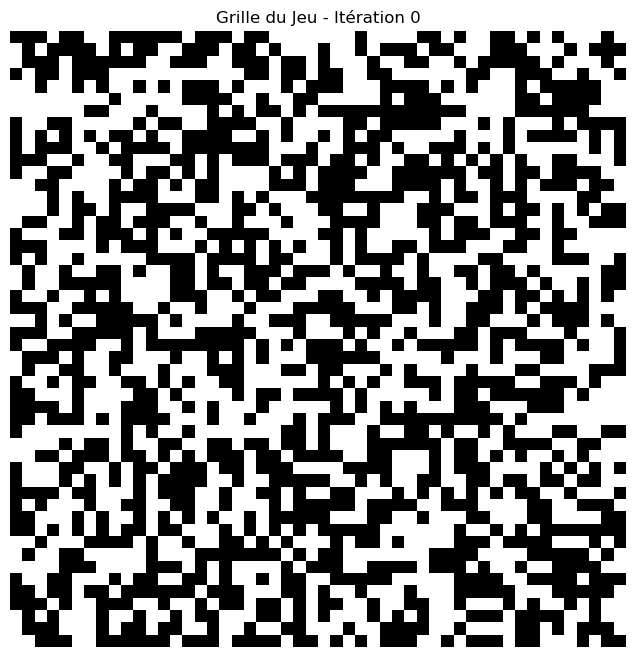

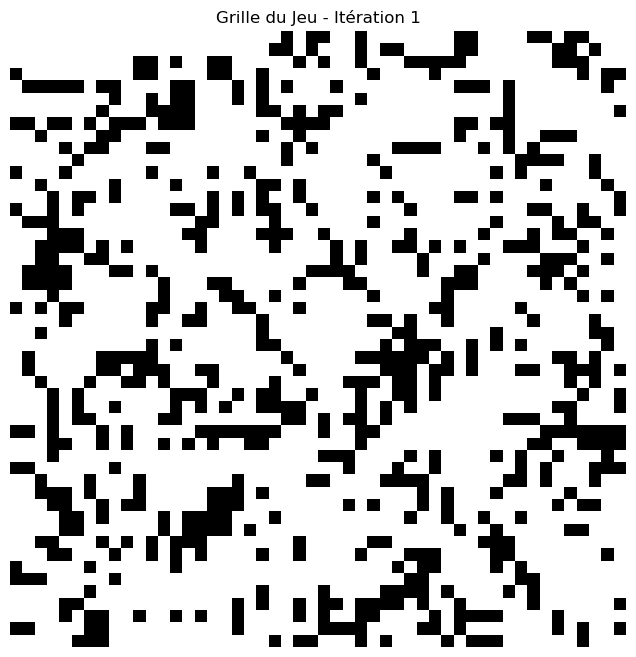

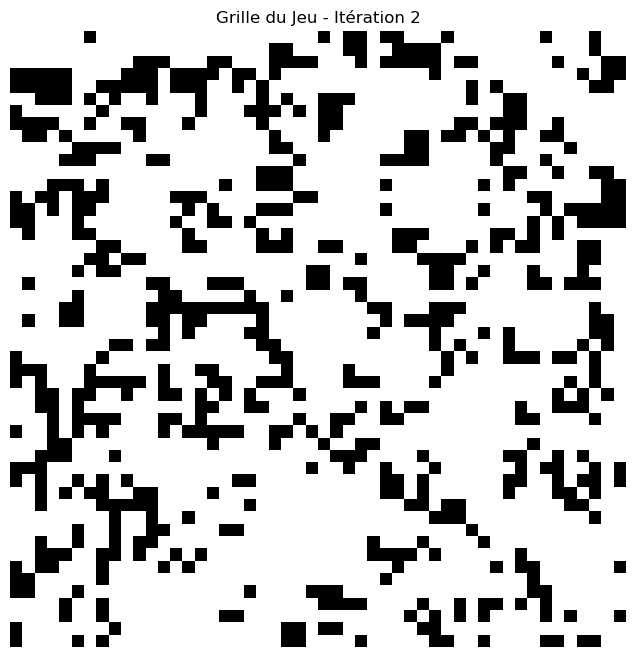

In [39]:
# Fonction pour afficher une grille
def afficher_grille(grille, iteration=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(grille, cmap="Greys", origin="upper")
    title = "Grille du Jeu"
    if iteration is not None:
        title += f" - Itération {iteration}"
    plt.title(title)
    plt.axis("off")
    plt.show()

# Initialisation de la grille
taille_grille = 50
grille = np.random.randint(2, size=(taille_grille, taille_grille))
regles = {'min_vivants': 2, 'max_vivants': 3, 'revient_a_la_vie': 3}

# Simulation
iterations = int(input("Entrez le nombre d'itérations à afficher : "))
cellules_vivantes = []

for i in range(iterations):
    afficher_grille(grille, iteration=i)
    cellules_vivantes.append(np.sum(grille))  # Enregistrer le nombre de cellules vivantes
    grille = appliquer_regles(grille, regles)

In [41]:
import numpy as np
import time

# Fonction d'optimisation pour le calcul des états des cellules
def appliquer_regles_optimise(grille, regles):
    vivantes = np.argwhere(grille == 1)  # Trouver les cellules vivantes
    a_verifier = set()  # Ensemble des cellules à vérifier

    # Ajouter les cellules vivantes et leurs voisins à vérifier
    for x, y in vivantes:
        a_verifier.add((x, y))
        for dx, dy in [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]:
            a_verifier.add(((x + dx) % grille.shape[0], (y + dy) % grille.shape[1]))

    nouvelle_grille = grille.copy()

    # Appliquer les règles sur les cellules à vérifier
    for x, y in a_verifier:
        voisins_vivants = np.sum(grille[x-1:x+2, y-1:y+2]) - grille[x, y]  # Compte les voisins vivants
        if grille[x, y] == 1:
            if voisins_vivants < regles['min_vivants'] or voisins_vivants > regles['max_vivants']:
                nouvelle_grille[x, y] = 0  # La cellule meurt
        else:
            if voisins_vivants == regles['revient_a_la_vie']:
                nouvelle_grille[x, y] = 1  # La cellule revient à la vie

    return nouvelle_grille

# Mesure du temps d'exécution de l'application des règles
def mesurer_temps_execution(grille, regles):
    debut = time.time()  # Heure de début
    nouvelle_grille = appliquer_regles_optimise(grille, regles)  # Application des règles
    fin = time.time()  # Heure de fin
    duree = fin - debut  # Calcul de la durée
    return duree, nouvelle_grille

Entrez le nom du fichier pour sauvegarder la grille (ex. 'grille.json') :  ZA


Grille sauvegardée dans ZA


Entrez le nom du fichier à charger (ex. 'grille.json') :  ZA


Grille chargée depuis ZA


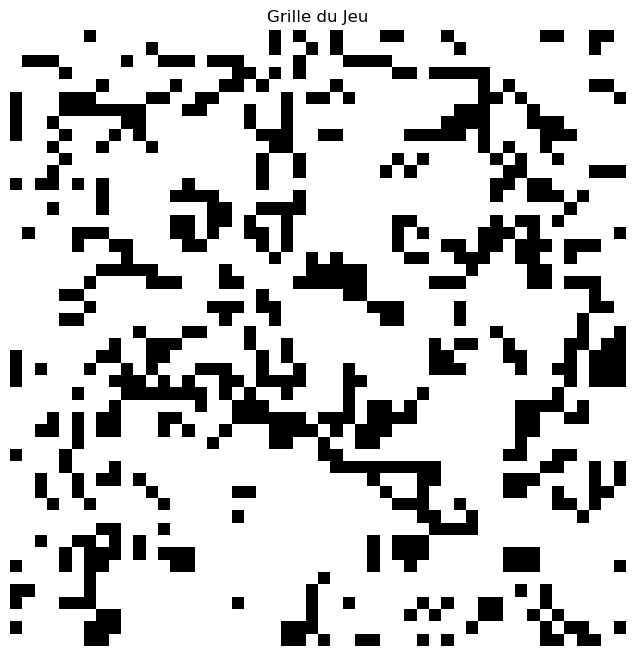

In [43]:
# Fonction pour sauvegarder une partie
def save_game(filename, grille, regles):
    game_state = {
        "taille_grille": grille.shape[0],
        "regles": regles,
        "grille": grille.tolist()
    }
    with open(filename, 'w') as file:
        json.dump(game_state, file)
    print(f"Grille sauvegardée dans {filename}")

# Fonction pour charger une partie
def load_game(filename):
    with open(filename, 'r') as file:
        game_state = json.load(file)
    taille_grille = game_state["taille_grille"]
    regles = game_state["regles"]
    grille = np.array(game_state["grille"], dtype=int)
    print(f"Grille chargée depuis {filename}")
    return grille, regles

# Sauvegarder la grille finale
filename = input("Entrez le nom du fichier pour sauvegarder la grille (ex. 'grille.json') : ")
save_game(filename, grille, regles)

# Charger la grille
filename = input("Entrez le nom du fichier à charger (ex. 'grille.json') : ")
grille_chargée, regles_chargées = load_game(filename)

# Afficher la grille chargée
if grille_chargée is not None:
    afficher_grille(grille_chargée)

In [45]:
# Fonction pour analyser les structures fixes
def analyser_structures_fixes(grille, still_lifes):
    counts = {key: 0 for key in still_lifes}
    for name, pattern in still_lifes.items():
        pattern_size = pattern.shape
        for x in range(grille.shape[0] - pattern_size[0] + 1):
            for y in range(grille.shape[1] - pattern_size[1] + 1):
                subgrid = grille[x:x + pattern_size[0], y:y + pattern_size[1]]
                if np.array_equal(subgrid, pattern):
                    counts[name] += 1
    return counts

# Analyse et affichage des structures fixes
structures_detectees = analyser_structures_fixes(grille_chargée, STILL_LIFES)
print("Structures fixes détectées :")
for structure, count in structures_detectees.items():
    print(f"{structure}: {count}")

Structures fixes détectées :
Block: 51
Beehive: 0
Loaf: 0
Boat: 0
Tub: 1


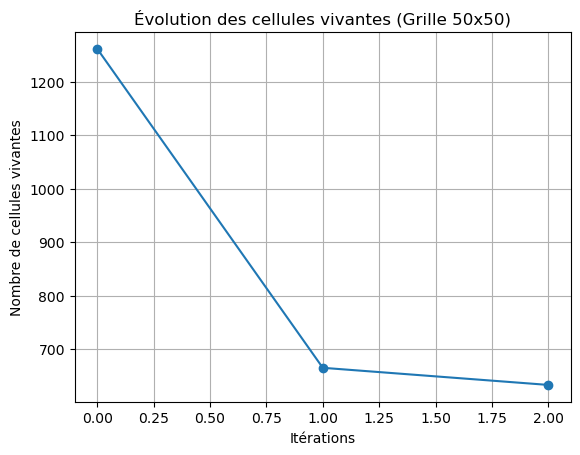

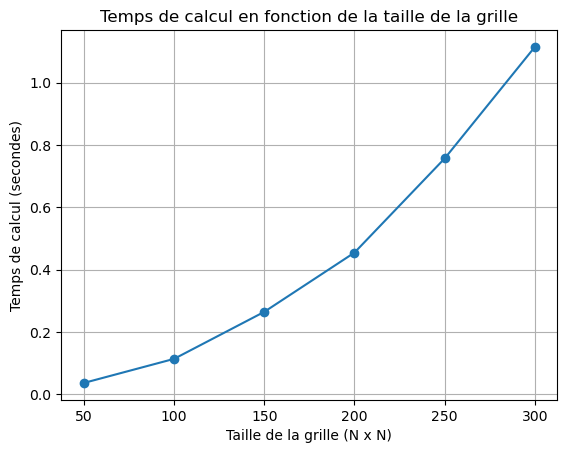

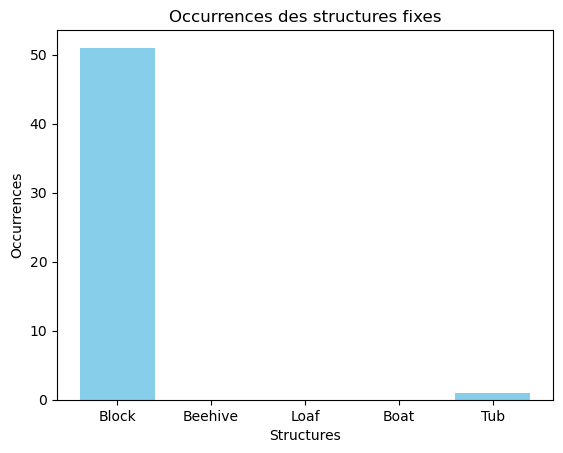

In [47]:
# Fonction pour afficher l'évolution des cellules vivantes
def afficher_evolution(cellules_vivantes):
    plt.plot(cellules_vivantes, marker='o')
    plt.title("Évolution des cellules vivantes (Grille 50x50)")
    plt.xlabel("Itérations")
    plt.ylabel("Nombre de cellules vivantes")
    plt.grid()
    plt.show()

# Temps de calcul pour différentes tailles de grilles
tailles = np.arange(50, 301, 50)
temps_calcul = []
for taille in tailles:
    grille_test = np.random.randint(2, size=(taille, taille))
    start_time = time.time()
    _ = appliquer_regles(grille_test, regles)
    temps_calcul.append(time.time() - start_time)

def afficher_temps_calcul(tailles, temps_calcul):
    plt.plot(tailles, temps_calcul, marker='o')
    plt.title("Temps de calcul en fonction de la taille de la grille")
    plt.xlabel("Taille de la grille (N x N)")
    plt.ylabel("Temps de calcul (secondes)")
    plt.grid()
    plt.show()

# Afficher l'histogramme des structures fixes
def afficher_histogramme_structures(structures_fixes):
    plt.bar(structures_fixes.keys(), structures_fixes.values(), color="skyblue")
    plt.title("Occurrences des structures fixes")
    plt.xlabel("Structures")
    plt.ylabel("Occurrences")
    plt.show()

# Afficher les graphiques
afficher_evolution(cellules_vivantes)
afficher_temps_calcul(tailles, temps_calcul)
afficher_histogramme_structures(structures_detectees)